ECE 8803 Final Project

In [32]:
import numpy as np
import pandas as pd
import os
from dataloader import OCTDataset
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np
import pandas as pd
from PIL import Image
import argparse
import os
import copy
import matplotlib.pyplot as plt



root = os.getcwd()
train = os.path.join(root, "df_prime_train.csv")
test = os.path.join(root, "df_prime_test.csv")



LABELS_SEVERITY = {35: 0,
                   43: 0,
                   47: 1,
                   53: 1,
                   61: 2,
                   65: 2,
                   71: 2,
                   85: 2}


def normalize_array(arr):
    """
    Normalize a 1D NumPy array to have values between 0 and 1.
    """
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    normalized_arr = (arr - arr_min) / (arr_max - arr_min)
    return normalized_arr



'''Obtain Dataset Images (image, label)'''


mean = (.1706)
std = (.2112)
normalize = transforms.Normalize(mean=mean, std=std)

transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    #normalize,
])

transform2 = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    normalize,
])

args = 'C:/Users/jgril/Documents/GitHub/8803_Final_Project'
image_trainset = OCTDataset(args, 'train', transform=transform)
image_testset = OCTDataset(args, 'test', transform=transform)

stupid_image_trainset = OCTDataset(args, 'train', transform=transform2)
stupid_image_testset = OCTDataset(args, 'test', transform=transform2)


print("loading data")

images_train = []
labels_train = []

stupid_images_train = []
stupid_labels_train = []

images_o_train = []
labels_o_train = []

for i in range(len(image_trainset)):
    #flattened training dataset
    image,label = image_trainset.__getitem__(i)
    my_image = normalize_array(image.flatten().numpy())
    images_train.append(my_image)
    labels_train.append(label)

    #flattened training dataset with stupid normalization
    image,label = stupid_image_trainset.__getitem__(i)
    my_image = image.flatten().numpy()
    stupid_images_train.append(my_image)
    stupid_labels_train.append(label)

    #non-flattened training dataset
    image_o ,label_o = image_trainset.__getitem__(i)
    my_image_o = torch.from_numpy(normalize_array(image_o.numpy()))
    images_o_train.append(my_image_o)
    labels_o_train.append(label_o)

images_test = []
labels_test = []

stupid_images_test = []
stupid_labels_test = []

images_o_test = []
labels_o_test = []

for i in range(len(image_testset)):
    #flattened training dataset
    image,label = image_trainset.__getitem__(i)
    my_image = image.flatten().numpy()
    images_test.append(my_image)
    labels_test.append(label)

    #flattened training dataset with stupid normalization
    image,label = stupid_image_testset.__getitem__(i)
    my_image = image.flatten().numpy()
    stupid_images_test.append(my_image)
    stupid_labels_test.append(label)

    #non-flattened training dataset
    image_o ,label_o = image_trainset.__getitem__(i)
    my_image_o = torch.from_numpy(normalize_array(image_o.numpy()))
    images_o_test.append(my_image_o)
    labels_o_test.append(label_o)

print("data loaded")



"""
'''Meta Train Data'''
meta_trainset = pd.read_csv(train).dropna()
meta_testset = pd.read_csv(test).dropna()

train = os.path.join(root, "df_prime_train.csv")
test = os.path.join(root, "df_prime_test.csv")

meta_X_train = meta_trainset[['Age', 'Gender', 'Race', "Diabetes_Type", "Diabetes_Years", "BMI", "BCVA", "CST", "Leakage_Index"]].to_numpy()
meta_Y_train = meta_trainset[["DRSS"]].to_numpy()
y = []
for i in range(meta_Y_train.shape[0]):
    y.append(LABELS_SEVERITY[int(meta_Y_train[i])])

meta_Y_train = np.array(y)



'''Meta Test Data'''
meta_X_test = meta_testset[['Age', 'Gender', 'Race', "Diabetes_Type", "Diabetes_Years", "BMI", "BCVA", "CST", "Leakage_Index"]].to_numpy()
meta_Y_test = meta_testset[["DRSS"]].to_numpy() 
y = []
for i in range(meta_Y_test.shape[0]):
    y.append(LABELS_SEVERITY[int(meta_Y_test[i])])

Y_test = np.array(y)
"""

#print(meta_X_train)
#print(meta_Y_train)
#print(meta_X_test)
#print(meta_Y_test)

loading data
data loaded


'\n\'\'\'Meta Train Data\'\'\'\nmeta_trainset = pd.read_csv(train).dropna()\nmeta_testset = pd.read_csv(test).dropna()\n\ntrain = os.path.join(root, "df_prime_train.csv")\ntest = os.path.join(root, "df_prime_test.csv")\n\nmeta_X_train = meta_trainset[[\'Age\', \'Gender\', \'Race\', "Diabetes_Type", "Diabetes_Years", "BMI", "BCVA", "CST", "Leakage_Index"]].to_numpy()\nmeta_Y_train = meta_trainset[["DRSS"]].to_numpy()\ny = []\nfor i in range(meta_Y_train.shape[0]):\n    y.append(LABELS_SEVERITY[int(meta_Y_train[i])])\n\nmeta_Y_train = np.array(y)\n\n\n\n\'\'\'Meta Test Data\'\'\'\nmeta_X_test = meta_testset[[\'Age\', \'Gender\', \'Race\', "Diabetes_Type", "Diabetes_Years", "BMI", "BCVA", "CST", "Leakage_Index"]].to_numpy()\nmeta_Y_test = meta_testset[["DRSS"]].to_numpy() \ny = []\nfor i in range(meta_Y_test.shape[0]):\n    y.append(LABELS_SEVERITY[int(meta_Y_test[i])])\n\nY_test = np.array(y)\n'

In [73]:
images_train = np.array(images_train)
labels_train = np.array(labels_train)

stupid_images_train = np.array(stupid_images_train)
stupid_labels_train = np.array(stupid_labels_train)

images_o_train = np.array(images_o_train)
labels_o_train = np.array(labels_o_train)


images_test = np.array(images_test)
labels_test = np.array(labels_test)

stupid_images_test = np.array(stupid_images_test)
stupid_labels_test = np.array(stupid_labels_test)

images_o_test = np.array(images_o_test)
labels_o_test = np.array(labels_o_test)


C:\Users\jgril\AppData\Local\Temp\ipykernel_26804\4239318429.py:7: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  images_o_train = np.array(images_o_train)
C:\Users\jgril\AppData\Local\Temp\ipykernel_26804\4239318429.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images_o_train = np.array(images_o_train)
C:\Users\jgril\AppData\Local\Temp\ipykernel_26804\42393184

In [79]:
# evaluate dataset
print("Flattened trained dataset")
print(images_train[0])
print(images_train[0].shape)
print(labels_train[0])
print(images_train.shape)
print(labels_train.shape)
print()

print("Flattened test dataset")
print(images_test[0])
print(images_test[0].shape)
print(labels_test[0])
print(images_test.shape)
print(labels_test.shape)
print()

print("Stupid Flattened trained dataset")
print(stupid_images_train[0])
print(stupid_images_train[0].shape)
print(stupid_labels_train[0])
print(stupid_images_train.shape)
print(stupid_labels_train.shape)
print()

print("Stupid Flattened test dataset")
print(stupid_images_test[0])
print(stupid_images_test[0].shape)
print(stupid_labels_test[0])
print(stupid_images_test.shape)
print(stupid_labels_test.shape)
print()

print("Original trained dataset")
print(images_o_train[0])
print(images_o_train[0].shape)
print(labels_o_train[0])
print(images_o_train.shape)
print(labels_o_train.shape)
print()

print("Original test dataset")
print(images_o_test[0])
print(images_o_test[0].shape)
print(labels_o_test[0])
print(images_o_test.shape)
print(labels_o_test.shape)

Flattened trained dataset
[0.032 0.02  0.028 ... 0.    0.    0.   ]
(50176,)
2
(24252, 50176)
(24252,)

Flattened test dataset
[0.03137255 0.01960784 0.02745098 ... 0.         0.         0.        ]
(50176,)
2
(7987, 50176)
(7987,)

Stupid Flattened trained dataset
[-0.6592209 -0.714925  -0.6777889 ... -0.8077651 -0.8077651 -0.8077651]
(50176,)
2
(24252, 50176)
(24252,)

Stupid Flattened test dataset
[-0.6777889  -0.6592209  -0.77062905 ... -0.8077651  -0.8077651
 -0.8077651 ]
(50176,)
0
(7987, 50176)
(7987,)

Original trained dataset
tensor([[[0.0320, 0.0200, 0.0280,  ..., 0.0000, 0.0000, 0.0000],
         [0.1320, 0.0760, 0.0960,  ..., 0.0000, 0.0000, 0.0000],
         [0.0720, 0.0400, 0.0360,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0400, 0.0080, 0.0040,  ..., 0.0000, 0.0000, 0.0000],
         [0.0160, 0.0040, 0.0080,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0040, 0.0080,  ..., 0.0000, 0.0000, 0.0000]]])
torch.Size([1, 224, 224])
2
(24252,)
(24252,)

Origin

Naive Bayes Implementation W/ Good Normalization

In [75]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, balanced_accuracy_score


#print(type(images_train[0]))
#print(images_train[0])
X_train = images_train
y_train = labels_train

X_test = images_test
y_test = labels_test


# train a Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# evaluate the classifier on the test data
y_pred = clf.predict(X_test)
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print("Balanced_Accuracy:", balanced_accuracy)

Accuracy: 0.5152122198572681
Balanced_Accuracy: 0.5431967644308622


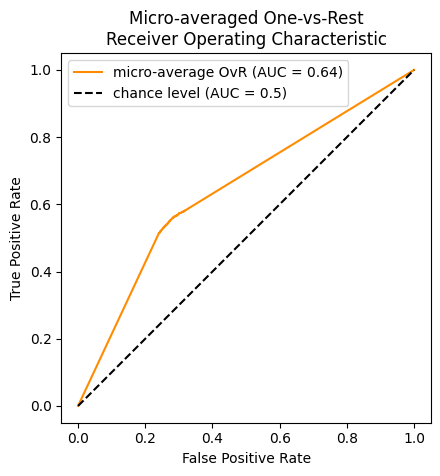

In [76]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay

classifier = GaussianNB()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()


In [42]:
from sklearn.metrics import f1_score, recall_score, precision_score
print("Recall: " + str(recall_score(y_test, y_pred, average = None)))
print("Precision: " + str(precision_score(y_test, y_pred, average = None, zero_division = 0)))

print("The F1 score for each class can be represented as such: ")
print(f1_score(y_test, y_pred, average=None))

Recall: [0.46391239 0.45989559 0.70578231]
Precision: [0.45821042 0.9047619  0.32668591]
The F1 score for each class can be represented as such: 
[0.46104378 0.6098175  0.44663677]


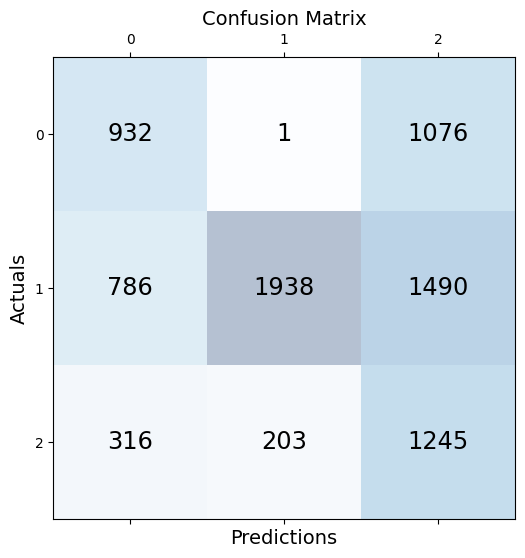

In [43]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

Naive Bayes W/ Bad Normalization

In [49]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


#print(type(images_train[0]))
#print(images_train[0])
X_train = stupid_images_train
y_train = stupid_labels_train

X_test = stupid_images_test
y_test = stupid_labels_test


# train a Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# evaluate the classifier on the test data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test,y_pred)
print('Accuracy:', accuracy)
print("Balanced Accuracy:", balanced_accuracy)

Accuracy: 0.4925503943908852
Balanced Accuracy: 0.4684125014770176


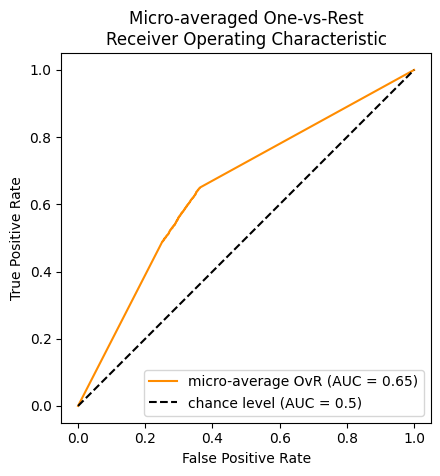

In [51]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay

classifier = GaussianNB()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()


In [52]:
from sklearn.metrics import f1_score, recall_score, precision_score
print("Recall: " + str(recall_score(y_test, y_pred, average = None)))
print("Precision: " + str(precision_score(y_test, y_pred, average = None, zero_division = 0)))

print("The F1 score for each class can be represented as such: ")
print(f1_score(y_test, y_pred, average=None))

Recall: [0.29277865 0.62397959 0.48847926]
Precision: [0.32210708 0.58044613 0.50926561]
The F1 score for each class can be represented as such: 
[0.30674342 0.60142611 0.49865591]


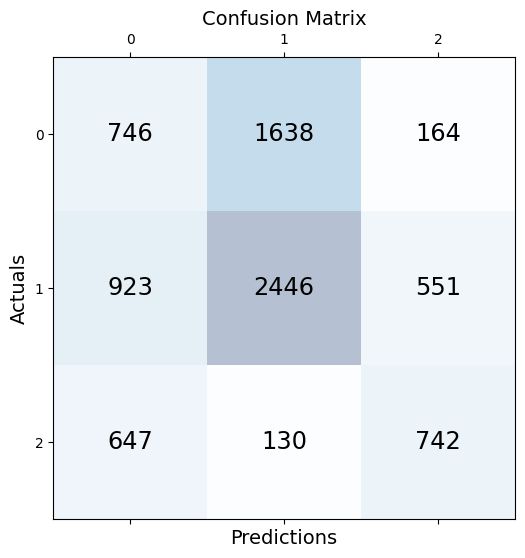

In [53]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

KNN w/ My Norm

In [62]:
import numpy as np
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

"""
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions


def knn_comparison(data, k):
 x = data[['X','Y']].values
 y = data['class'].astype(int).values
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)
# Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
 plt.xlabel('X')
 plt.ylabel('Y')
 plt.title('Knn with K='+ str(k))
 plt.show()
"""
 
# Set number of neighbors
k = 5

# Read dataset
X_train = images_train
y_train = labels_train
X_test = images_test
y_test = labels_test

# Fit kNN model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict labels for testing set
y_pred = knn.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print("Balanced_Accuracy:", balanced_accuracy)

Accuracy: 0.8933266558157005
Balanced_Accuracy: 0.8783118087469437


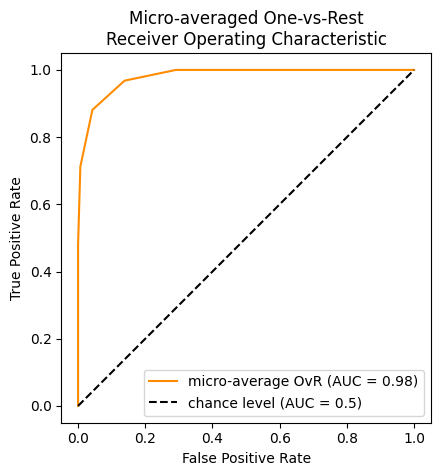

In [63]:
classifier = KNeighborsClassifier()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()


In [64]:
from sklearn.metrics import f1_score, recall_score, precision_score
print("Recall: " + str(recall_score(y_test, y_pred, average = None)))
print("Precision: " + str(precision_score(y_test, y_pred, average = None, zero_division = 0)))

print("The F1 score for each class can be represented as such: ")
print(f1_score(y_test, y_pred, average=None))

Recall: [0.90791439 0.92429995 0.80272109]
Precision: [0.8146494  0.90518243 0.9799308 ]
The F1 score for each class can be represented as such: 
[0.85875706 0.91464131 0.88251792]


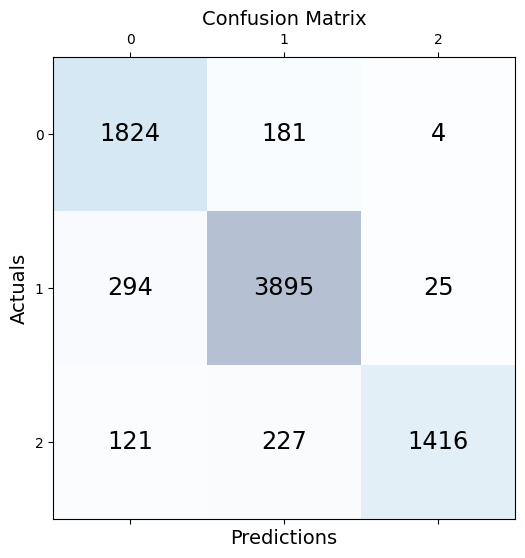

In [65]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

KNN w/ Guassan Norm

In [66]:
import numpy as np
import cv2
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

"""
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions


def knn_comparison(data, k):
 x = data[['X','Y']].values
 y = data['class'].astype(int).values
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)
# Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
 plt.xlabel('X')
 plt.ylabel('Y')
 plt.title('Knn with K='+ str(k))
 plt.show()
"""
 
# Set number of neighbors
k = 5

# Read dataset
X_train = stupid_images_train
y_train = stupid_labels_train
X_test = stupid_images_test
y_test = stupid_labels_test

# Fit kNN model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict labels for testing set
y_pred = knn.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print("Balanced_Accuracy:", balanced_accuracy)

Accuracy: 0.3912607987980468
Balanced_Accuracy: 0.33545095457537855


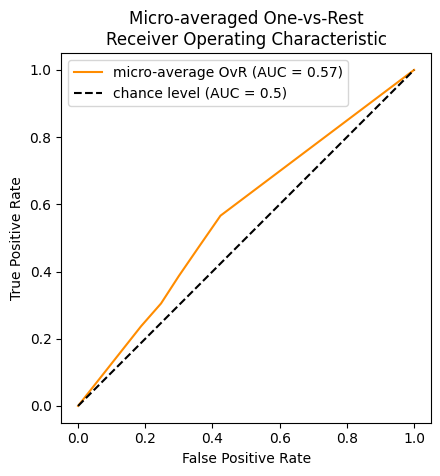

In [67]:
classifier = KNeighborsClassifier()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()


In [68]:
from sklearn.metrics import f1_score, recall_score, precision_score
print("Recall: " + str(recall_score(y_test, y_pred, average = None)))
print("Precision: " + str(precision_score(y_test, y_pred, average = None, zero_division = 0)))

print("The F1 score for each class can be represented as such: ")
print(f1_score(y_test, y_pred, average=None))

Recall: [0.37755102 0.50306122 0.12574062]
Precision: [0.32743363 0.50460594 0.16739702]
The F1 score for each class can be represented as such: 
[0.3507109  0.5038324  0.14360902]


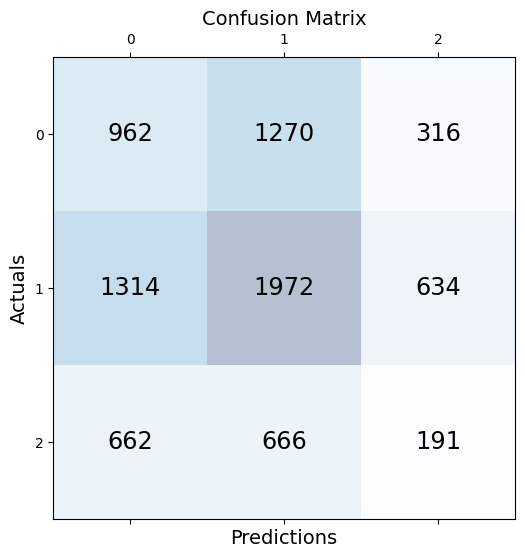

In [69]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

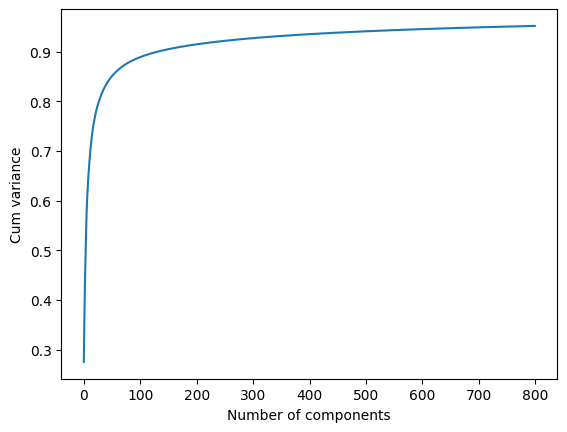

In [23]:
from sklearn.decomposition import PCA

#PCA for better feature condesnsing
pca_test = PCA(n_components=300) #
pca_test.fit(images_train)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cum variance")
plt.show()

CNN

In [5]:
"""
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Define the autoencoder model
input_img = Input(shape=(224, 224, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

# Extract the encoder part of the autoencoder
encoder = Model(inputs=input_img, outputs=encoded)

# Encode the test data
encoded_imgs = encoder.predict(X_test)

"""


"\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D\n\n# Define the autoencoder model\ninput_img = Input(shape=(224, 224, 1))\nx = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)\nx = MaxPooling2D((2, 2), padding='same')(x)\nx = Conv2D(16, (3, 3), activation='relu', padding='same')(x)\nx = MaxPooling2D((2, 2), padding='same')(x)\nx = Conv2D(8, (3, 3), activation='relu', padding='same')(x)\nencoded = MaxPooling2D((2, 2), padding='same')(x)\n\nx = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)\nx = UpSampling2D((2, 2))(x)\nx = Conv2D(16, (3, 3), activation='relu', padding='same')(x)\nx = UpSampling2D((2, 2))(x)\nx = Conv2D(32, (3, 3), activation='relu', padding='same')(x)\nx = UpSampling2D((2, 2))(x)\ndecoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)\n\nautoencoder = Model(inputs=input_img, outputs=decoded)\nautoencoder.compile(optimizer='adam', loss='binary_crossent

In [70]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Load a sample dataset of handwritten digits
digits = load_digits()

# Define the number of principal components to keep
n_components = 20

# Initialize a PCA object with the desired number of components
pca = PCA(n_components=n_components)

# Fit the PCA object to the data
X_pca = pca.fit_transform(digits.data)

# Reshape the PCA-transformed data to match the expected input shape of a CNN
X_pca = X_pca.reshape(X_pca.shape[0], n_components, 1, 1)

# Convert the target labels to one-hot encoding
y = keras.utils.to_categorical(digits.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the architecture of the CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(n_components, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model what are you d
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


NameError: name 'train_test_split' is not defined

Untrained AlexNet

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader



# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)

print(alexnet.named_modules)

"""
# Freeze all pre-trained layers
for param in alexnet.parameters():
    param.requires_grad = False
"""
    
# Replace last fully connected layer with a new one
num_classes = 3 # number of classes in your dataset
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.classifier[6].parameters(), lr=0.001, momentum=0.9)


# Load your training and validation datasets
train_loader = DataLoader(image_trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(image_testset, batch_size=64, shuffle=False)

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<bound method Module.named_modules of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features

In [5]:
# Test the model
alexnet.eval()
total_correct = 0
total_images = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

Accuracy of the network on the 7987 test images: 49 %


Try with PCA

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [ ]:
# Load pre-trained AlexNet model
alexnet = models.alexnet(pretrained=False)
print(alexnet.named_modules)

In [ ]:
# Format our train and test sets
X_train = stupid_images_train
y_train = stupid_labels_train
X_test = stupid_images_test
y_test = stupid_labels_test

In [72]:
# Fit the PCA
print(X_train.shape)
print(X_test.shape)

n_PCA_components = 100
pca = PCA(n_components=n_PCA_components)
train_PCA = pca.fit_transform(X_train)
test_PCA = pca.transform(X_test) #Make sure you are just transforming, not fitting. 

print(train_PCA.shape)
print(test_PCA.shape)

AttributeError: 'list' object has no attribute 'shape'

In [9]:


    
# Replace last fully connected layer with a new one
num_classes = 3 # number of classes in your dataset
alexnet.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
alexnet.classifier[6] = nn.Linear(4096, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.classifier[6].parameters(), lr=0.001, momentum=0.9)


# Load your training and validation datasets
train_loader = DataLoader(train_PCA, batch_size=64, shuffle=True)
test_loader = DataLoader(test_PCA, batch_size=64, shuffle=False)

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)
for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_PCA):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<bound method Module.named_modules of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features

ValueError: too many values to unpack (expected 2)

In [ ]:
# Test the model
alexnet.eval()
total_correct = 0
total_images = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

Pretrained Resnet

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms
from torchvision.models import resnet18

'''
# Define the transformation to apply to the images
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
'''


# Define the dataset and data loader
train_loader = DataLoader(image_trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(image_testset, batch_size=64, shuffle=False)



# Load the pre-trained ResNet-18 model and modify it for grayscale images
model = resnet18(pretrained=True)
num_features = model.fc.in_features

#freeze layers
for param in model.parameters():
    param.requires_grad = False

model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
model.fc = nn.Linear(num_features, 3)

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

# Test the model
model.eval()
total_correct = 0
total_images = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


KeyboardInterrupt: 